In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def compareProbabilityDensityOfAgesInCategory(full,subcat):
    fig,ax = plt.subplots()
    full['Age'].plot.kde(ax=ax,label="Full Data, Ages")
    full[full[subcat]==1.0]['Age'].plot.kde(ax=ax, label="{}, Ages".format(subcat))
    ax.set_ylabel('Probability')
    ax.legend()
    
    sub = full[full[subcat]==1.0]
    diff_mean = df['Age'].mean() - sub['Age'].mean()
    print("difference in age means: {}".format(diff_mean))
    diff_var = df['Age'].var() - sub['Age'].var()
    print("difference in age variances: {}".format(diff_var))

In [9]:
df = pd.read_csv('./data/train_plus_PIDs.csv') # training data from CheXpert-v1.0-small
df.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,PID
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,1
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,-1.0,-1.0,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN,2
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,3


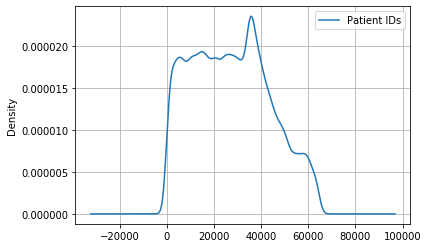

In [35]:
# look at distribution of patient IDs
fig,ax = plt.subplots()
df['PID'].plot.kde(ax=ax,label="Patient IDs")
ax.grid('y')
ax.legend()

The above figure shows the frequency of imaging studies associated with a given patient in the training dataset. 

max number of studies for a patient: 92
min number of studies for a patient: 1
avg number of studies for a patient: 3.461636194607995
avg number of studies for a patient: 21.712855966412242


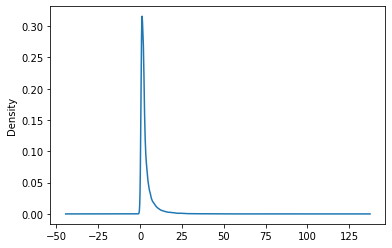

In [34]:
pvt = pd.pivot_table(df, index='PID', aggfunc='size')
print('max number of studies for a patient: {}'.format(pvt.max()))
print('min number of studies for a patient: {}'.format(pvt.min()))
print('avg number of studies for a patient: {}'.format(pvt.mean()))
print('avg number of studies for a patient: {}'.format(pvt.var()))
pvt.plot.kde()

Looks like an exponential distribution (which is fair). There are a whole lot of patients who have had very few imaging studies and very few patients who have had many imaging studies.

difference in age means: 9.502321338406198
difference in age variances: 4.232494189332101


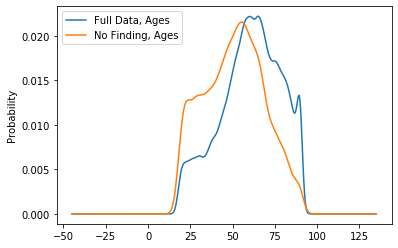

In [4]:
# investigate subset where there was no finding
compareProbabilityDensityOfAgesInCategory(df,'No Finding')

difference in age means: 3.8649911268872046
difference in age variances: -9.828751656942188


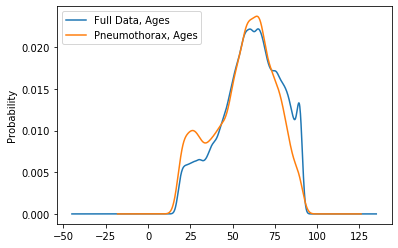

In [5]:
# investigate subset where there was pneumothorax
compareProbabilityDensityOfAgesInCategory(df,'Pneumothorax')

difference in age means: -0.9277536738612469
difference in age variances: -24.549256473406274


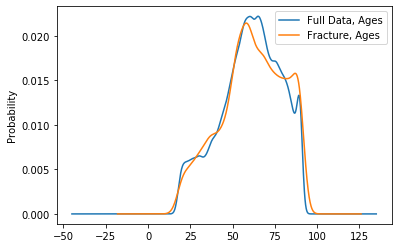

In [6]:
# investigate subset where there was fracture
compareProbabilityDensityOfAgesInCategory(df,'Fracture')